In [1]:
import pandas as pd
import numpy as np

import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import folium


In [2]:
df = pd.read_csv('police_department_data.csv')
df

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)"


In [3]:
df.shape

(150500, 9)

In [4]:
df.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location'],
      dtype='object')

In [5]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [6]:
df.tail()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)"
150499,179002868,OTHER OFFENSES,"FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...",2016-12-02 14:00:00,SOUTHERN,NONE,800 Block of BRYANT ST,17900286809024,"(37.775420706711, -122.403404791479)"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   incident_id          150500 non-null  int64 
 1   category             150500 non-null  object
 2   crime_description    150500 non-null  object
 3   crime_date           150500 non-null  object
 4   department_district  150499 non-null  object
 5   resolution           150500 non-null  object
 6   address              150500 non-null  object
 7   department_id        150500 non-null  int64 
 8   location             150500 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.3+ MB


In [8]:
df.describe()

,incident_id,department_id
count,1.505000e+05,1.505000e+05
mean,1.616440e+08,1.616440e+13
std,5.535976e+06,5.535976e+11
min,1.135121e+07,1.135121e+12
25%,1.603283e+08,1.603283e+13
50%,1.606541e+08,1.606541e+13
75%,1.609764e+08,1.609764e+13
max,9.910090e+08,9.910090e+13


In [9]:
df.isnull().sum()


incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [10]:
# filling missing value

df['department_district'].fillna(df['department_district'].mode()[0], inplace = True)

In [11]:
df.isnull().any().any()

False

C:\Users\Pravin\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


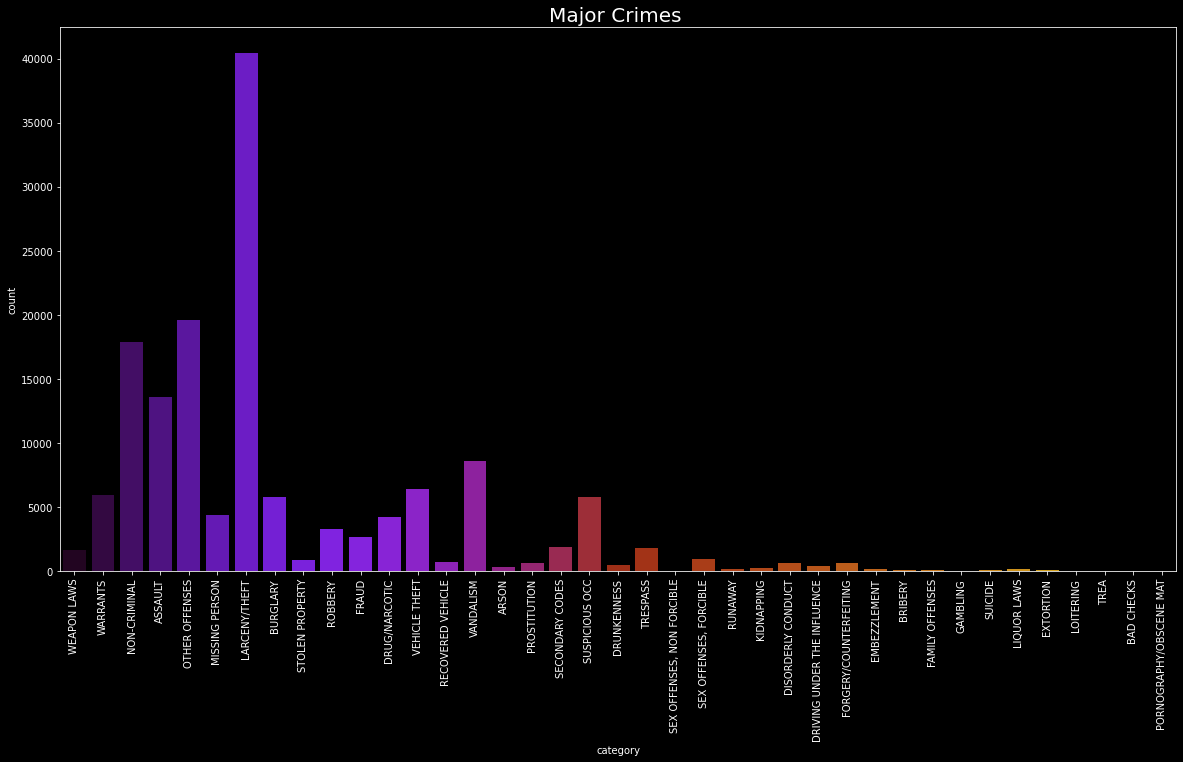

In [12]:
# categories of crime

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('dark_background')

sns.countplot(df['category'], palette = 'gnuplot')

plt.title('Major Crimes ', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


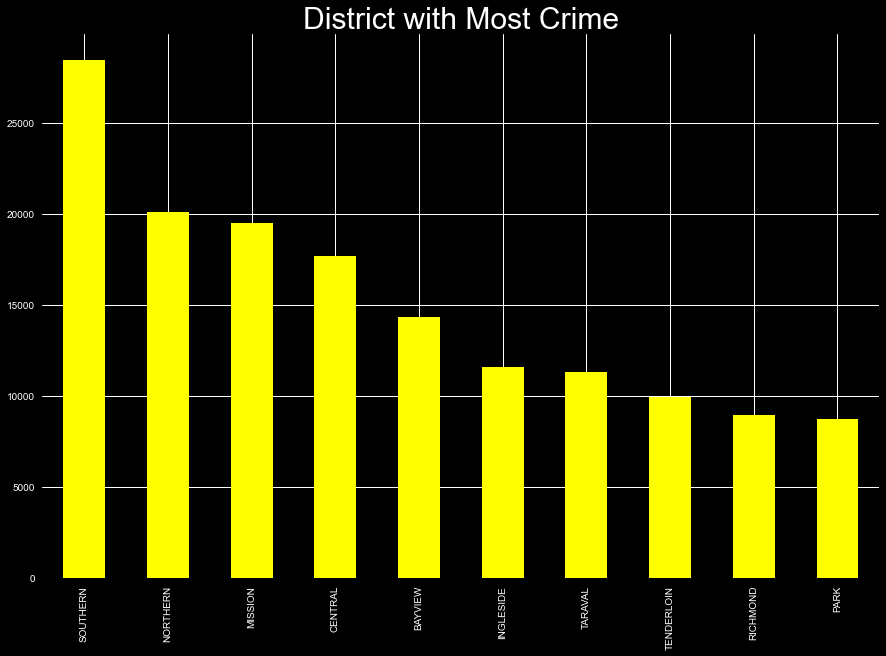

In [13]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(128,10,1))
df['department_district'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

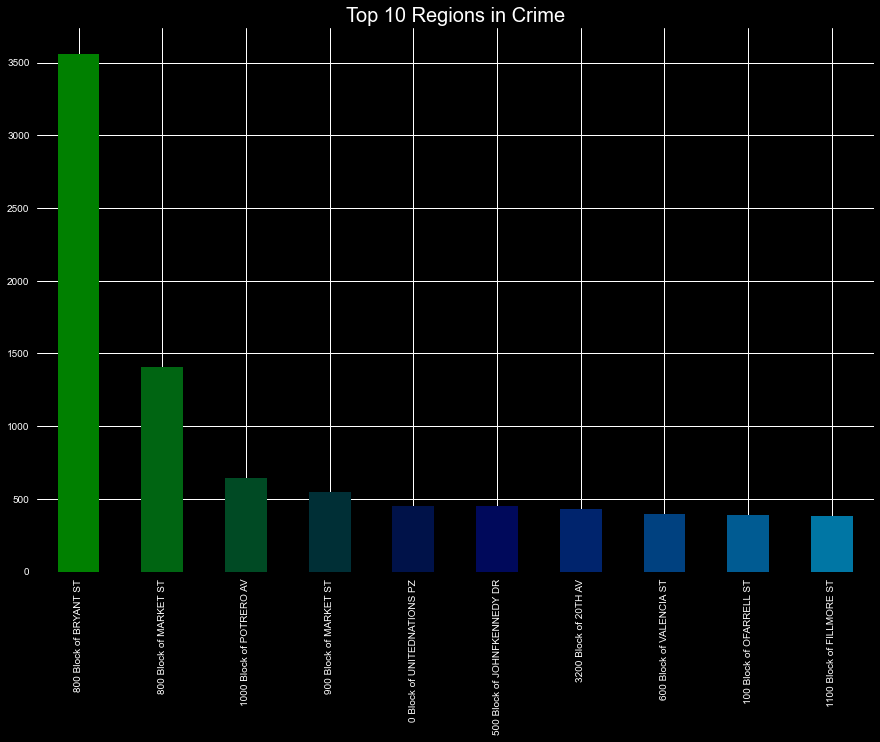

In [14]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.ocean(np.linspace(0,1,15))
df['address'].value_counts().head(10).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 10 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

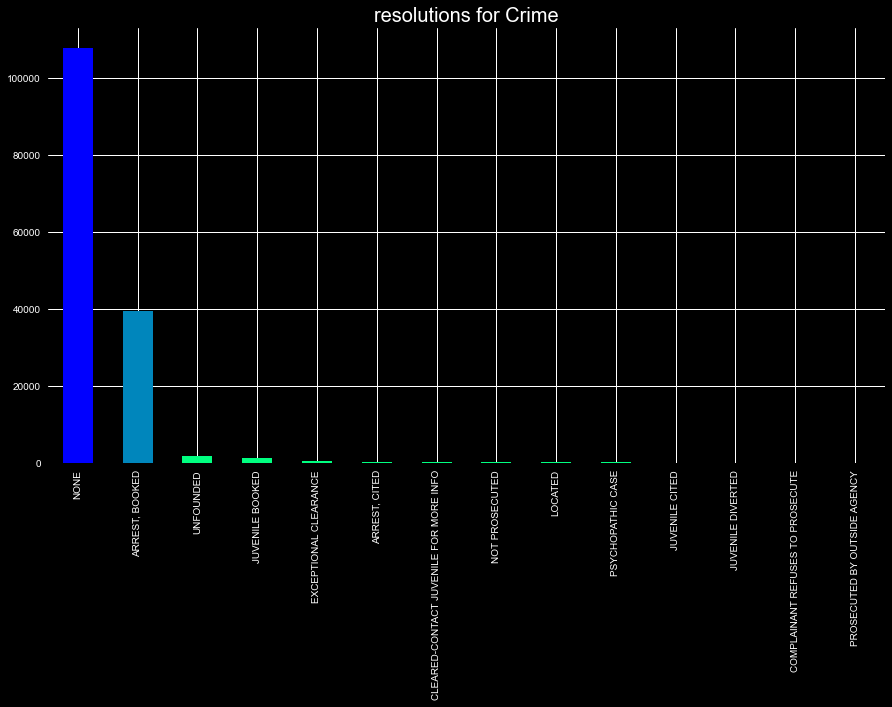

In [15]:
# Regions with count of crimes

plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 10, 20))
df['resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('resolutions for Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

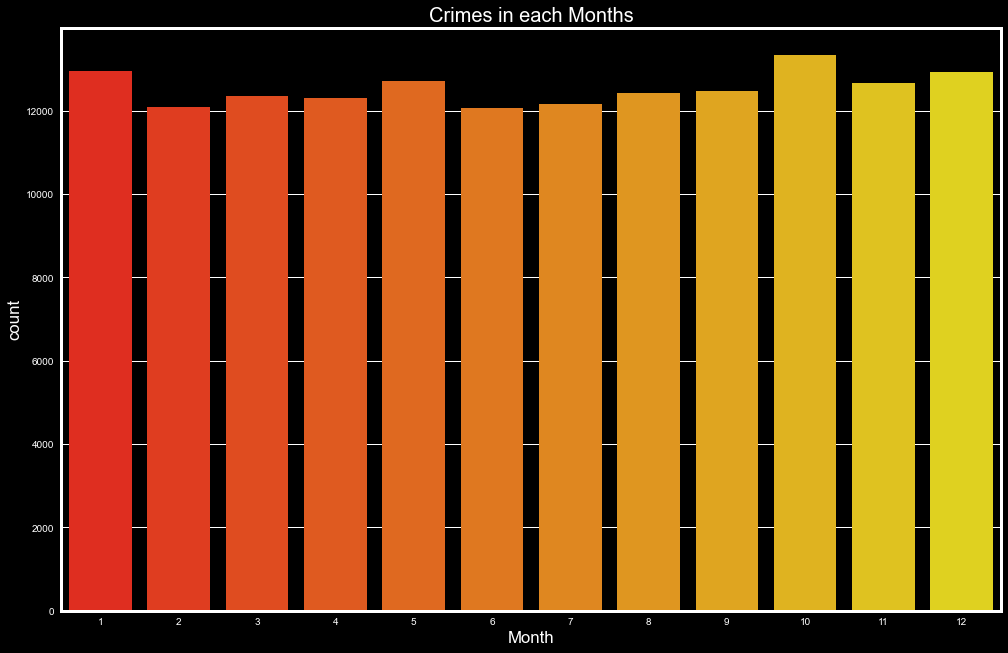

In [49]:
df['crime_date'] = pd.to_datetime(df['crime_date'])

df['Month'] = df['crime_date'].dt.month

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 10)

sns.countplot(df['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

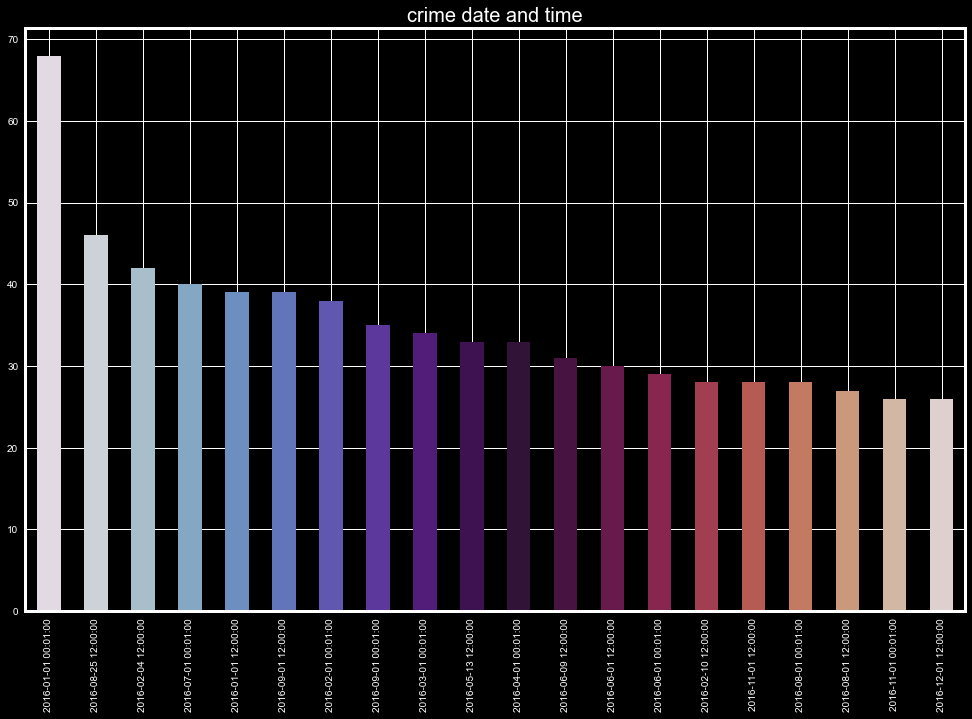

In [26]:
# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
df['crime_date'].value_counts().head(20).plot.bar(color = color, figsize = (15, 10))

plt.title('crime date and time', fontsize = 20)
plt.show()

In [52]:
t = df.department_district.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Area'}, axis='columns', inplace=True)

table

,Area,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [45]:
c_map = folium.Map(location = [37.7714278595913, -122.453981622365], zoom_start = 12, tiles="CartoDB dark_matter")

In [51]:
c_map